In [15]:
# HIDDEN
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plots.style.use('fivethirtyeight')

In [16]:
# HIDDEN

def count_zero(array):
    """Counts the number of 0's in an array"""
    return len(array) - np.count_nonzero(array)

def count_equal(array1, array2):
    """Takes two numerical arrays of equal length
    and counts the indices where the two are equal"""
    return count_zero(array1 - array2)

In [17]:
patients = Table.read_table('breast-cancer.csv').drop('ID')

In [18]:
shuffled_patients = patients.sample(with_replacement=False) 
training_set = shuffled_patients.take(np.arange(341))
test_set  = shuffled_patients.take(np.arange(341, 683))

In [19]:
training_chromatin = training_set.select('Class', 'Bland Chromatin')
training_chromatin

Class,Bland Chromatin
1,7
0,1
0,3
0,3
0,2
0,3
0,1
1,5
0,2
1,3


In [20]:
training_counts = training_chromatin.pivot('Class', 'Bland Chromatin')

In [21]:
training_counts

Bland Chromatin,0,1
1,81,2
2,74,4
3,52,14
4,6,12
5,3,14
6,1,3
7,2,41
8,0,17
9,0,7
10,0,8


In [22]:
def proportions(array):
    return array/np.sum(array)

In [23]:
training_dists = training_counts.select(0).with_columns(
   '0', proportions(training_counts.column('0')),
    '1', proportions(training_counts.column('1'))
)

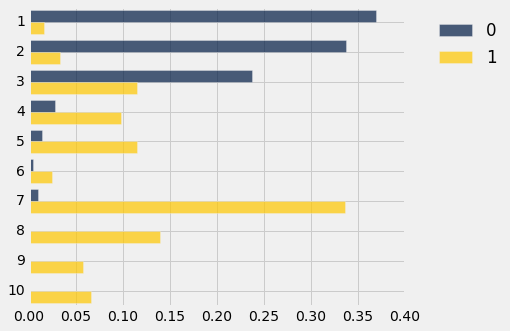

In [24]:
training_dists.barh(0)

In [25]:
classification = test_set.column('Uniformity of Cell Size') > 3

In [26]:
count_equal(classification, test_set.column('Class'))/test_set.num_rows

0.9327485380116959

In [48]:
clump = patients.select('Class', 'Clump Thickness').relabel('Clump Thickness', 'Thickness')

In [49]:
clump

Class,Thickness
0,5
0,5
0,3
0,6
0,4
1,8
0,1
0,2
0,2
0,4


In [50]:
counts = clump.pivot('Class', 'Thickness')
counts

Thickness,0,1
1,136,3
2,46,4
3,92,12
4,67,12
5,83,45
6,15,18
7,1,22
8,4,40
9,0,14
10,0,69


In [51]:
def proportions(array):
    return array/np.sum(array)

In [52]:
distributions = Table().with_columns(
    'Thickness', counts.column(0),
    '0', proportions(counts.column('0')),
    '1', proportions(counts.column('1'))

)

In [53]:
distributions

Thickness,0,1
1,0.306306,0.0125523
2,0.103604,0.0167364
3,0.207207,0.0502092
4,0.150901,0.0502092
5,0.186937,0.188285
6,0.0337838,0.0753138
7,0.00225225,0.0920502
8,0.00900901,0.167364
9,0,0.0585774
10,0,0.288703


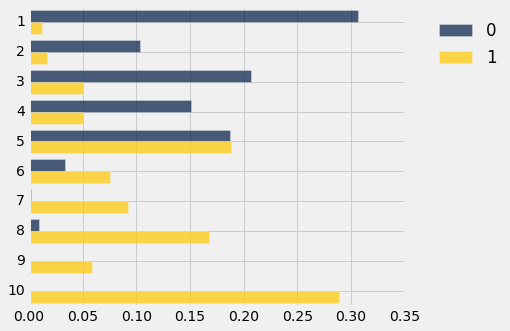

In [54]:
distributions.barh(0)

In [55]:
clump

Class,Thickness
0,5
0,5
0,3
0,6
0,4
1,8
0,1
0,2
0,2
0,4


In [73]:
shuffled_thickness = clump.select('Thickness').sample(with_replacement=False)

In [74]:
shuffled_thickness

Thickness
4
1
1
5
1
3
2
1
3
8


In [75]:
clump = clump.with_column('Shuffled Thickness', shuffled_thickness.column(0))

In [76]:
clump

Class,Thickness,Shuffled Thickness
0,5,4
0,5,1
0,3,1
0,6,5
0,4,1
1,8,3
0,1,2
0,2,1
0,2,3
0,4,8


In [77]:
shuffled = clump.select('Class', 'Shuffled Thickness')

In [78]:
shuffled_counts = shuffled.pivot('Class', 'Shuffled Thickness')

In [79]:
shuffled_dists = Table().with_columns(
    'Thickness', shuffled_counts.column(0),
    '0', proportions(shuffled_counts.column('0')),
    '1', proportions(shuffled_counts.column('1'))
)

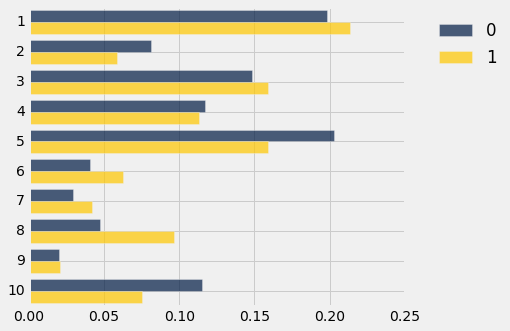

In [80]:
shuffled_dists.barh(0)

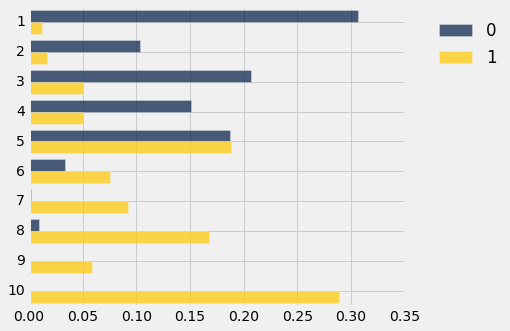

In [67]:
distributions.barh(0)

In [68]:
def tvd(dist1, dist2):
    return 0.5*(np.sum(np.abs(dist1 - dist2)))

In [81]:
tvd(distributions.column(1), distributions.column(2))

0.63831090504730681

In [82]:
tvd(shuffled_dists.column(1), shuffled_dists.column(2))

0.10990802517999171